In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy as deepcopy

In [10]:
mean = list()
std = list()
# epsilon=1e-17
# learning_rate = 10**(-1)

table = pd.read_csv('IA1_train.csv')
table = table.drop('id', axis=1)
table[['month','day','year']] = table['date'].str.split("/",expand=True)
table = table[['month','day','year','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','price']]
table = table.astype({'year':'int','month':'int','day':'int'})
table['age_since_renovated'] = np.where(table['yr_renovated']==0, table['year'] - table['yr_built'], table['year'] - table['yr_renovated'])
table = table[['month','day','year','age_since_renovated','bedrooms','bathrooms','sqft_living','sqft_lot','floors','view','condition','grade','sqft_above','sqft_basement','yr_built','zipcode','lat','long','sqft_living15','sqft_lot15','waterfront','price']]
table.insert(0, "bias", 1)

# for col in table.columns[0:20]:
#     mean.append(table[col].mean())
#     std.append(table[col].std())
    
# table.iloc[:,0:20] = table.iloc[:,0:20].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

w0 = {'w' : [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]}

w = pd.DataFrame(data=w0)
w.insert(1,'dlw',0)

In [11]:
table

,bias,month,day,year,age_since_renovated,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront,price
0,1,5,21,2014,58,3,1.00,1020,7874,1.0,...,1020,0,1956,98106,47.5175,-122.346,1290,7320,0,2.1800
1,1,6,9,2014,45,3,2.25,2210,8000,2.0,...,2210,0,1969,98023,47.3085,-122.381,1990,8000,0,2.5025
2,1,2,18,2015,12,4,2.50,2350,5835,2.0,...,2350,0,2003,98042,47.3494,-122.153,3010,5772,0,2.7000
3,1,5,22,2014,107,3,1.50,1660,4800,2.0,...,1660,0,1907,98119,47.6352,-122.358,1690,4000,0,9.2630
4,1,9,5,2014,25,3,2.50,2410,9916,2.0,...,2410,0,1989,98052,47.6911,-122.103,2310,8212,0,7.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1,2,26,2015,52,4,1.75,2000,7350,1.0,...,1100,900,1963,98003,47.3428,-122.303,1720,7350,0,2.6700
7996,1,9,26,2014,18,4,2.25,1870,6693,2.0,...,1870,0,1996,98003,47.2774,-122.299,1650,6518,0,2.9900
7997,1,11,19,2014,60,2,1.00,1240,5500,1.0,...,1240,0,1954,98102,47.6461,-122.317,2080,4400,0,9.0000
7998,1,10,14,2014,110,3,1.50,1280,2114,1.5,...,1280,0,1904,98122,47.6174,-122.308,1540,1456,0,6.8750


In [12]:
w

,w,dlw
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [13]:
epsilon=1e-5
learning_rate = 10**(1)
mse_list = list()
for i in range(5000):    
    wt = w['w'].to_numpy()
    w['dlw'] = 0
    mse = 0

    for _ in range(table.shape[0]):
        xi = table.iloc[_,:22].to_numpy()
        w['dlw'] += ((sum(wt*xi) - table.loc[_,'price'])*xi)*(2/table.shape[0])
#     print(w['dlw'])
    w['w'] = w['w'] - learning_rate * w['dlw']
    print("======================epoch : ", i, " ===========================")
#     print(w['w'])
#     print(w['dlw'].tolist())
    for _ in range(table.shape[0]):
#         xi = table.iloc[_,:20].to_numpy()
#         w['dlw'] += ((sum(wt*xi) - table.loc[_,'price'])*xi)*(2/table.shape[0])
        mse += 1/table.shape[0]*(table.loc[_,'price'] - sum(w['w'].to_numpy()*table.iloc[_,:22].to_numpy()))**2
    mse_list.append(mse)
    print(mse_list)
    if w['dlw'].all() < epsilon:
        print("break is worked")
        break

======================epoch :  0  ===========================
[8.497972446997884e+32]
======================epoch :  1  ===========================
[8.497972446997884e+32, 3.478217325914374e+55]
======================epoch :  2  ===========================
[8.497972446997884e+32, 3.478217325914374e+55, 1.4314863287765603e+78]
======================epoch :  3  ===========================
[8.497972446997884e+32, 3.478217325914374e+55, 1.4314863287765603e+78, 5.8929837978996756e+100]
======================epoch :  4  ===========================
[8.497972446997884e+32, 3.478217325914374e+55, 1.4314863287765603e+78, 5.8929837978996756e+100, 2.4259902802051895e+123]
======================epoch :  5  ===========================
[8.497972446997884e+32, 3.478217325914374e+55, 1.4314863287765603e+78, 5.8929837978996756e+100, 2.4259902802051895e+123, 9.987186245879555e+145]
======================epoch :  6  ===========================
[8.497972446997884e+32, 3.478217325914374e+55, 1.4314863287765

<ipython-input-13-67fbf9b89457>:20: RuntimeWarning: overflow encountered in double_scalars
  mse += 1/table.shape[0]*(table.loc[_,'price'] - sum(w['w'].to_numpy()*table.iloc[_,:22].to_numpy()))**2


[8.497972446997884e+32, 3.478217325914374e+55, 1.4314863287765603e+78, 5.8929837978996756e+100, 2.4259902802051895e+123, 9.987186245879555e+145, 4.111471225206555e+168, 1.6925884073875597e+191, 6.967957113451721e+213, 2.868531187096103e+236, 1.1809015235555165e+259, 4.861472012606769e+281, 2.0013447063901465e+304, inf]
======================epoch :  14  ===========================
[8.497972446997884e+32, 3.478217325914374e+55, 1.4314863287765603e+78, 5.8929837978996756e+100, 2.4259902802051895e+123, 9.987186245879555e+145, 4.111471225206555e+168, 1.6925884073875597e+191, 6.967957113451721e+213, 2.868531187096103e+236, 1.1809015235555165e+259, 4.861472012606769e+281, 2.0013447063901465e+304, inf, inf]
======================epoch :  15  ===========================
[8.497972446997884e+32, 3.478217325914374e+55, 1.4314863287765603e+78, 5.8929837978996756e+100, 2.4259902802051895e+123, 9.987186245879555e+145, 4.111471225206555e+168, 1.6925884073875597e+191, 6.967957113451721e+213, 2.8685311

<ipython-input-13-67fbf9b89457>:20: RuntimeWarning: overflow encountered in multiply
  mse += 1/table.shape[0]*(table.loc[_,'price'] - sum(w['w'].to_numpy()*table.iloc[_,:22].to_numpy()))**2


[8.497972446997884e+32, 3.478217325914374e+55, 1.4314863287765603e+78, 5.8929837978996756e+100, 2.4259902802051895e+123, 9.987186245879555e+145, 4.111471225206555e+168, 1.6925884073875597e+191, 6.967957113451721e+213, 2.868531187096103e+236, 1.1809015235555165e+259, 4.861472012606769e+281, 2.0013447063901465e+304, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]


<ipython-input-13-67fbf9b89457>:11: RuntimeWarning: overflow encountered in multiply
  w['dlw'] += ((sum(wt*xi) - table.loc[_,'price'])*xi)*(2/table.shape[0])
<ipython-input-13-67fbf9b89457>:11: RuntimeWarning: invalid value encountered in multiply
  w['dlw'] += ((sum(wt*xi) - table.loc[_,'price'])*xi)*(2/table.shape[0])
<ipython-input-13-67fbf9b89457>:11: RuntimeWarning: overflow encountered in double_scalars
  w['dlw'] += ((sum(wt*xi) - table.loc[_,'price'])*xi)*(2/table.shape[0])


======================epoch :  27  ===========================
[8.497972446997884e+32, 3.478217325914374e+55, 1.4314863287765603e+78, 5.8929837978996756e+100, 2.4259902802051895e+123, 9.987186245879555e+145, 4.111471225206555e+168, 1.6925884073875597e+191, 6.967957113451721e+213, 2.868531187096103e+236, 1.1809015235555165e+259, 4.861472012606769e+281, 2.0013447063901465e+304, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan]
======================epoch :  28  ===========================
[8.497972446997884e+32, 3.478217325914374e+55, 1.4314863287765603e+78, 5.8929837978996756e+100, 2.4259902802051895e+123, 9.987186245879555e+145, 4.111471225206555e+168, 1.6925884073875597e+191, 6.967957113451721e+213, 2.868531187096103e+236, 1.1809015235555165e+259, 4.861472012606769e+281, 2.0013447063901465e+304, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan]
======================epoch :  29  ===========================
[8.497972446997884e+32, 

======================epoch :  44  ===========================
[8.497972446997884e+32, 3.478217325914374e+55, 1.4314863287765603e+78, 5.8929837978996756e+100, 2.4259902802051895e+123, 9.987186245879555e+145, 4.111471225206555e+168, 1.6925884073875597e+191, 6.967957113451721e+213, 2.868531187096103e+236, 1.1809015235555165e+259, 4.861472012606769e+281, 2.0013447063901465e+304, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
======================epoch :  45  ===========================
[8.497972446997884e+32, 3.478217325914374e+55, 1.4314863287765603e+78, 5.8929837978996756e+100, 2.4259902802051895e+123, 9.987186245879555e+145, 4.111471225206555e+168, 1.6925884073875597e+191, 6.967957113451721e+213, 2.868531187096103e+236, 1.1809015235555165e+259, 4.861472012606769e+281, 2.0013447063901465e+304, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, na

======================epoch :  59  ===========================
[8.497972446997884e+32, 3.478217325914374e+55, 1.4314863287765603e+78, 5.8929837978996756e+100, 2.4259902802051895e+123, 9.987186245879555e+145, 4.111471225206555e+168, 1.6925884073875597e+191, 6.967957113451721e+213, 2.868531187096103e+236, 1.1809015235555165e+259, 4.861472012606769e+281, 2.0013447063901465e+304, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
======================epoch :  60  ===========================
[8.497972446997884e+32, 3.478217325914374e+55, 1.4314863287765603e+78, 5.8929837978996756e+100, 2.4259902802051895e+123, 9.987186245879555e+145, 4.111471225206555e+168, 1.6925884073875597e+191, 6.967957113451721e+213, 2.868531187096103e+236, 1.1809015235555165e+259, 4.861472012606769e+281, 2.0013447063901465e+304, inf, in

======================epoch :  72  ===========================
[8.497972446997884e+32, 3.478217325914374e+55, 1.4314863287765603e+78, 5.8929837978996756e+100, 2.4259902802051895e+123, 9.987186245879555e+145, 4.111471225206555e+168, 1.6925884073875597e+191, 6.967957113451721e+213, 2.868531187096103e+236, 1.1809015235555165e+259, 4.861472012606769e+281, 2.0013447063901465e+304, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
======================epoch :  73  ===========================
[8.497972446997884e+32, 3.478217325914374e+55, 1.4314863287765603e+78, 5.8929837978996756e+100, 2.4259902802051895e+123, 9.987186245879555e+145, 4.111471225206555e+168, 1.6925884073875597e+191, 6.967957113451721e+213, 2.868531187096103e+236, 1.18090152355551

======================epoch :  84  ===========================
[8.497972446997884e+32, 3.478217325914374e+55, 1.4314863287765603e+78, 5.8929837978996756e+100, 2.4259902802051895e+123, 9.987186245879555e+145, 4.111471225206555e+168, 1.6925884073875597e+191, 6.967957113451721e+213, 2.868531187096103e+236, 1.1809015235555165e+259, 4.861472012606769e+281, 2.0013447063901465e+304, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
======================epoch :  85  ===========================
[8.497972446997884e+32, 3.478217325914374e+55, 1.4314863287765603e+78, 5.8929837978996756e+100, 2.4259902802051895e+123, 9.987186245879555e+145, 4.111471225206555e+168, 1.6925884073875597e+191, 6.96

KeyboardInterrupt: 

<AxesSubplot:>

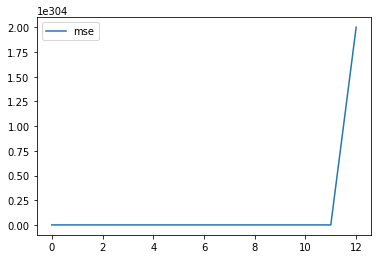

In [14]:
mse = [8.497972446997884e+32, 3.478217325914374e+55, 1.4314863287765603e+78, 5.8929837978996756e+100, 2.4259902802051895e+123, 9.987186245879555e+145, 4.111471225206555e+168, 1.6925884073875597e+191, 6.967957113451721e+213, 2.868531187096103e+236, 1.1809015235555165e+259, 4.861472012606769e+281, 2.0013447063901465e+304]


mse_data = pd.DataFrame(data=mse,columns=['mse'])
mse_data.plot()